In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [6]:
df = pd.read_csv("Iris.csv")
X_vis = df[['PetalLengthCm', 'PetalWidthCm']]
y_vis = df['Species']

In [21]:
X_vis_scaled = StandardScaler().fit_transform(X_vis)
print("First 5 rows of original features:\n", X_vis.head())
print("First 5 rows of target labels:\n", y_vis.head())
print("Normalized features:\n", X_vis_scaled[:5])
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis_scaled, y_vis, test_size=0.3, random_state=42)

knn_vis = KNeighborsClassifier(n_neighbors=3)
knn_vis.fit(X_train_vis, y_train_vis)



First 5 rows of original features:
    PetalLengthCm  PetalWidthCm
0            1.4           0.2
1            1.4           0.2
2            1.3           0.2
3            1.5           0.2
4            1.4           0.2
First 5 rows of target labels:
 0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object
Normalized features:
 [[-1.3412724  -1.31297673]
 [-1.3412724  -1.31297673]
 [-1.39813811 -1.31297673]
 [-1.2844067  -1.31297673]
 [-1.3412724  -1.31297673]]


,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [22]:
h = 0.02
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [23]:
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = pd.Categorical(Z).codes  
Z = Z.reshape(xx.shape)


cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

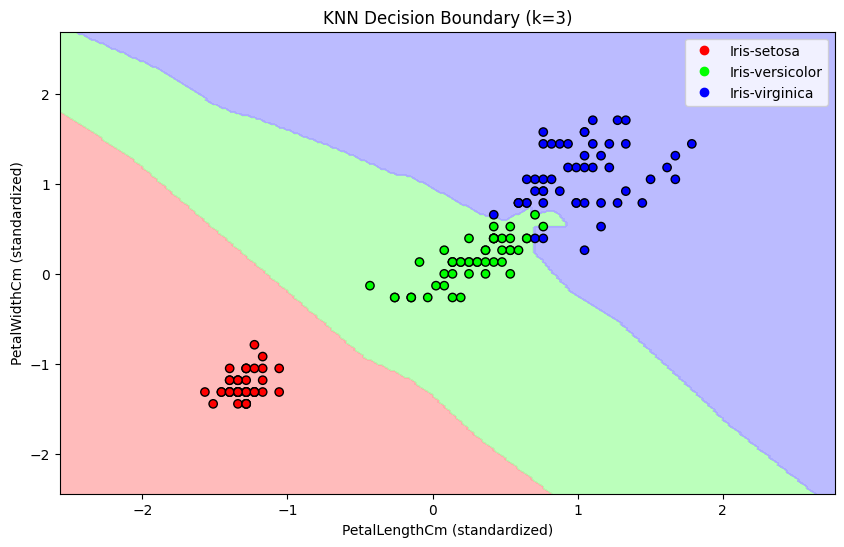

In [24]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)
scatter = plt.scatter(
    X_vis_scaled[:, 0], X_vis_scaled[:, 1],
    c=pd.Categorical(y_vis).codes, cmap=cmap_bold, edgecolor='k'
)
plt.xlabel('PetalLengthCm (standardized)')
plt.ylabel('PetalWidthCm (standardized)')
plt.title("KNN Decision Boundary (k=3)")

handles, _ = scatter.legend_elements()
plt.legend(handles=handles, labels=knn_vis.classes_.tolist())  # <-- fix here

plt.show()
